Text(0, 0.5, 'entry b')

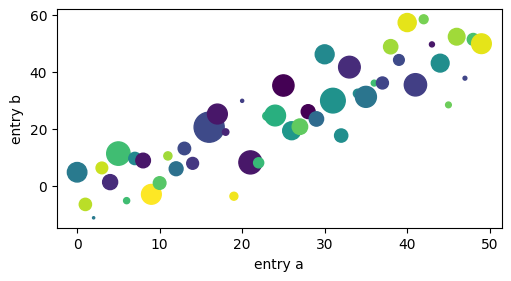

In [5]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50) # yaxis
data['d'] = np.abs(data['d']) * 150 # dots size

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

####  the "object-oriented (OO) style" to explicitly create Figures and Axes, and call methods on them

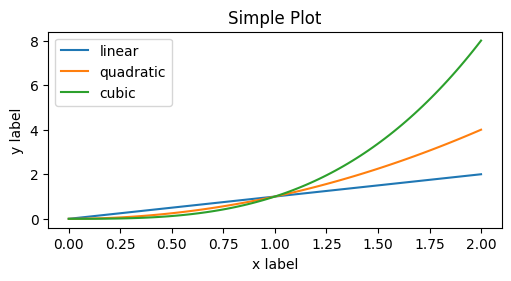

In [6]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

#### the *pyplot style* can be very convenient for quick interactive work.

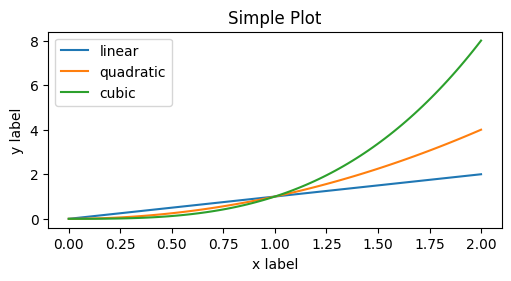

In [7]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

#### plotter function

In [8]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

Text(0.5, 0.98, 'Common title here')

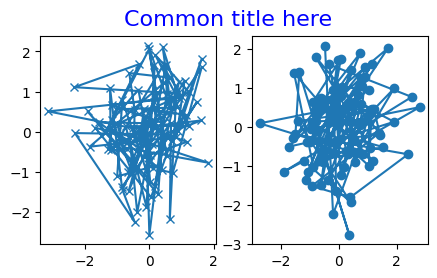

In [9]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});
plt.suptitle("Common title here", fontsize = 16, color = 'b')

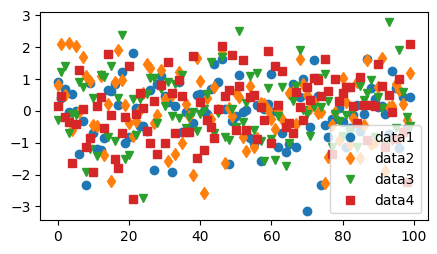

In [6]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

##### Axes labels and text

[]

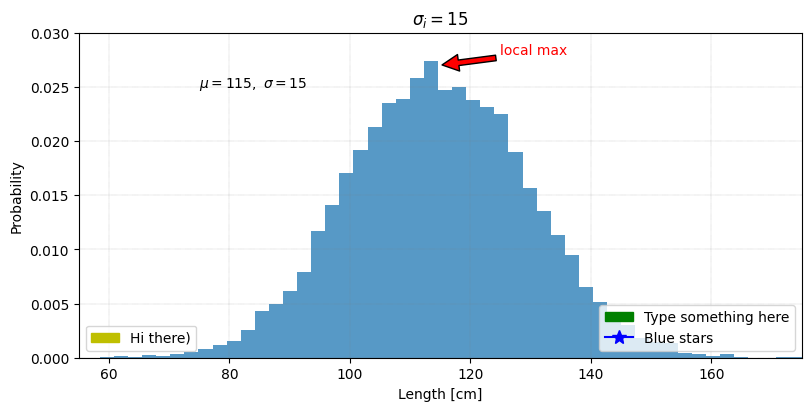

In [7]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(8, 4), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
# ax.set_title('Aardvark lengths\n (not really)')
ax.set_title(r'$\sigma_i=15$') #Using mathematical expressions in text
ax.text(75, .025, r'$\mu=115,\ \sigma=15$') # Using mathematical expressions in text
ax.axis([55, 175, 0, 0.03]) # [x_low, x_high, y_low, y_high]
ax.grid(color='gray', axis='both', linestyle=':', linewidth=0.3)
ax.annotate('local max', xy=(115, 0.027), xytext=(125, 0.028), color = "r",
            arrowprops=dict(facecolor='r', shrink=0.03))

# adding a patch
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

red_patch = mpatches.Patch(color='g', label='Type something here')
blue_line = mlines.Line2D([100,150], [0,0.02], color='blue', marker='*',
                          markersize=10, label='Blue stars') 

#Multiple legends on the same Axes
first_legend = ax.legend(handles=[red_patch, blue_line], loc='lower right')
# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Create another legend for the second line.
yellow_patch = mpatches.Patch(color='y', label='Hi there)')
ax.legend(handles=[yellow_patch], loc='lower left')

ax.plot()           

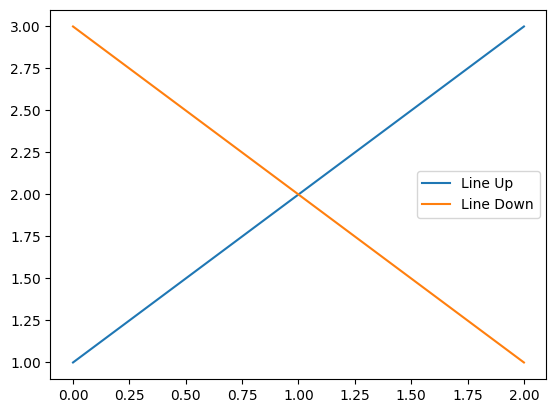

In [8]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line 2')
line_down, = ax.plot([3, 2, 1], label='Line 1')
ax.legend([line_up, line_down], ['Line Up', 'Line Down'])

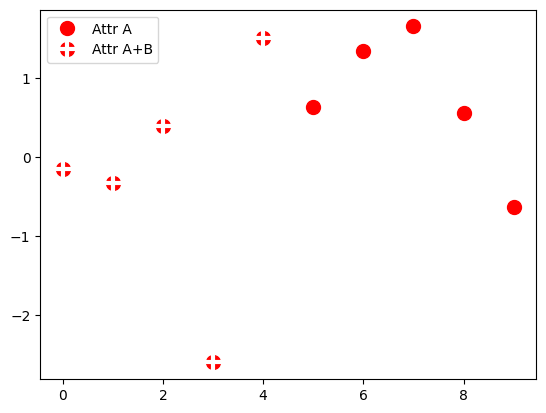

In [9]:
from numpy.random import randn

z = randn(10)

fig, ax = plt.subplots()
red_dot,  = ax.plot(z, "ro", markersize=10) # returns a list of matplotlib.lines.Line2D
# Put a white cross over some of the data.
white_cross, = ax.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

ax.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

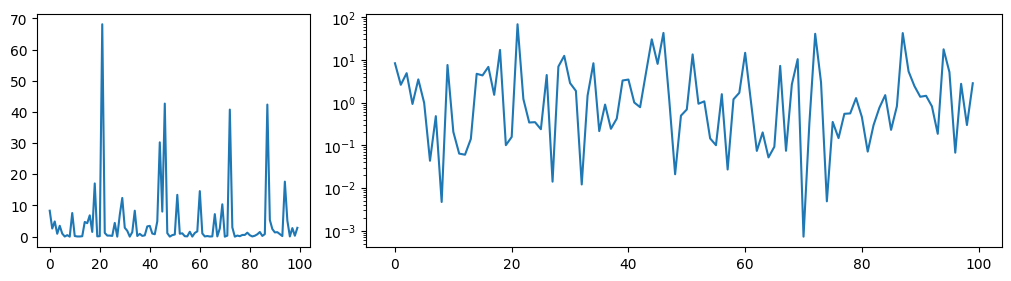

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 2.7), layout='constrained', width_ratios = (0.3,0.7))
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data);

##### Date tick labels 

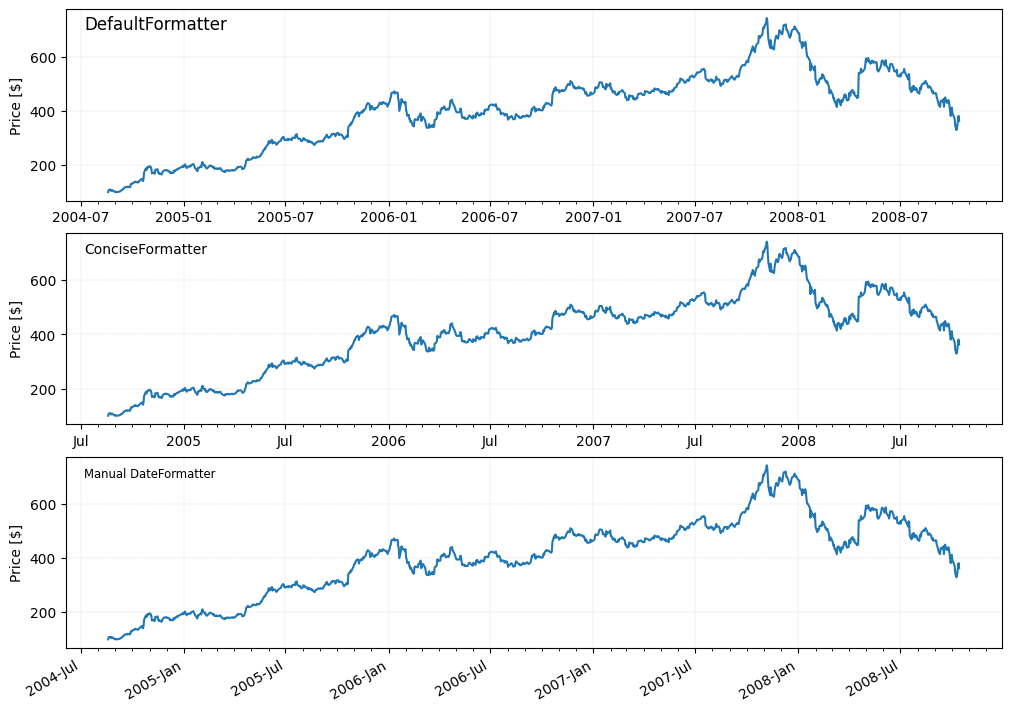

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, high,
# low, close, volume, adj_close from the mpl-data/sample_data directory. The
# record array stores the date as an np.datetime64 with a day unit ('D') in
# the date column.
data = cbook.get_sample_data('goog.npz', np_load=True)['price_data']

fig, axs = plt.subplots(3, 1, figsize=(10, 7), constrained_layout=True)
# common to all three:
for ax in axs:
    ax.plot('date', 'adj_close', data=data)
    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(linestyle=':', linewidth=0.3)
    ax.set_ylabel(r'Price [\$]')

# different formats:

axs[0].set_title('DefaultFormatter', loc='left', y=0.85, x=0.02, fontsize='large')

axs[1].set_title('ConciseFormatter', loc='left', y=0.85, x=0.02, fontsize='medium')
axs[1].xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

axs[2].set_title('Manual DateFormatter', loc='left', y=0.85, x=0.02,
             fontsize='small')

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

#### Additional axes

In [12]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)

Text(0.5, 0, 'Angle [°]')

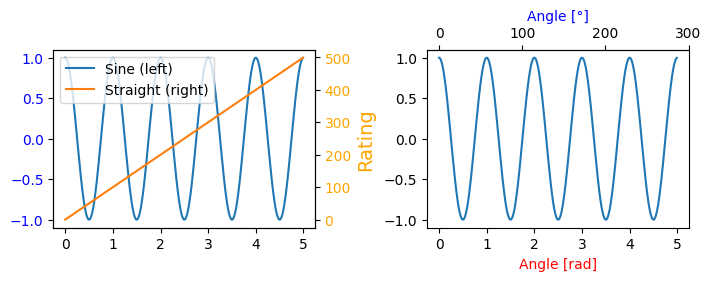

In [13]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax1.tick_params(axis='y', labelcolor='b')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylabel('Rating', color='orange', fontsize=14)
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]', color = "r")
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]', color = "b")

### Colormap plots
* [Choosing colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

Text(0.5, 1.0, 'scatter()')

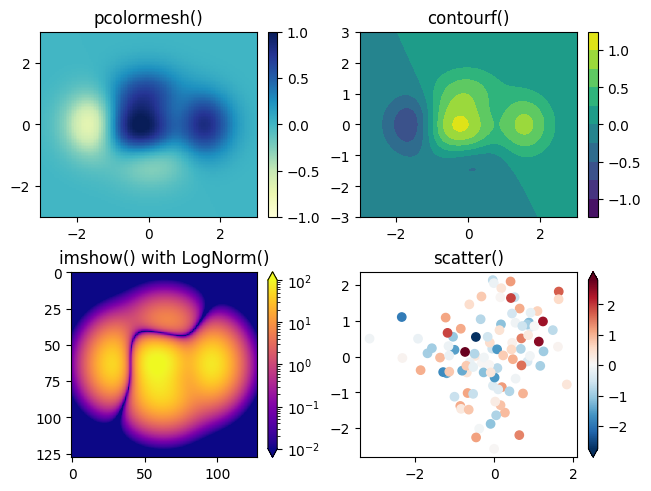

In [14]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='YlGnBu')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

In [15]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

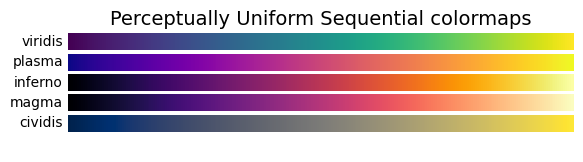

In [16]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

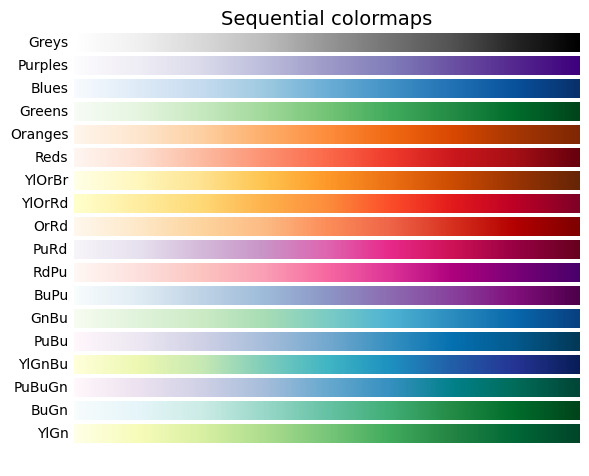

In [17]:
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

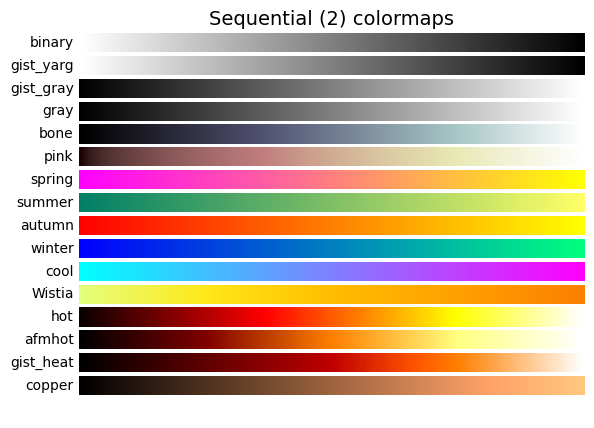

In [18]:
plot_color_gradients('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])

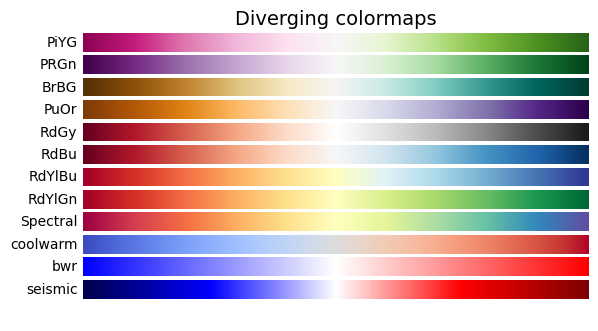

In [19]:
plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])

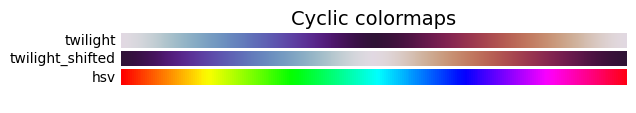

In [20]:
plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])

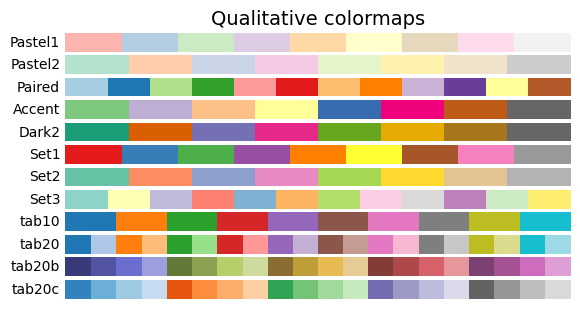

In [21]:
plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])

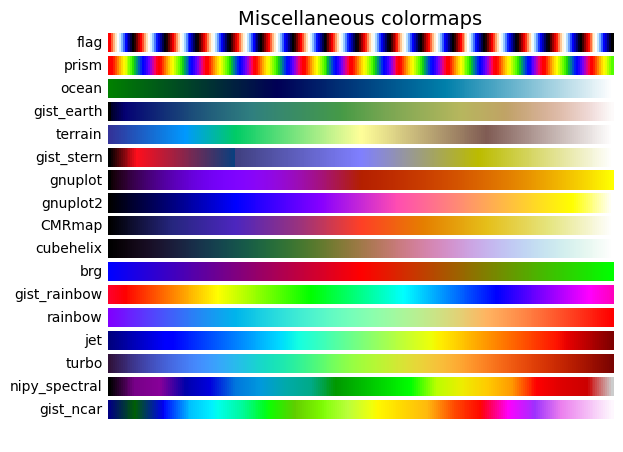

In [22]:
plot_color_gradients('Miscellaneous',
                     ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo', 'nipy_spectral', 'gist_ncar'])

plt.show()

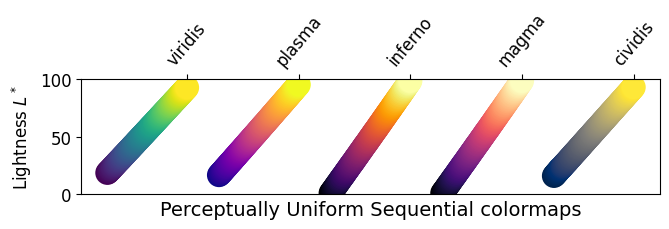

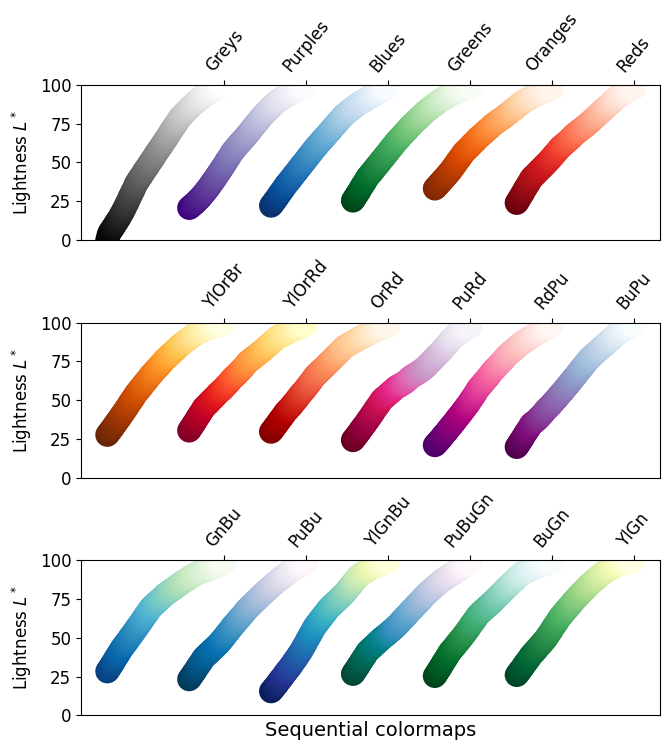

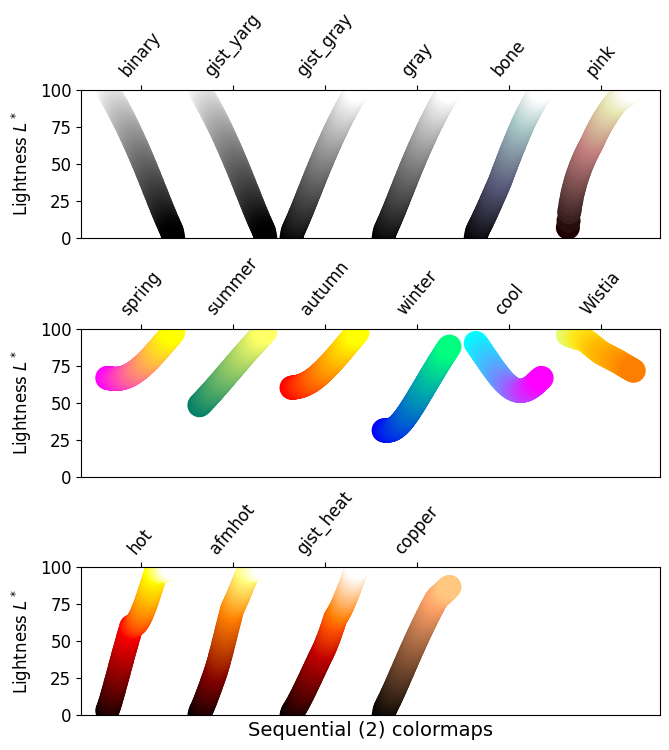

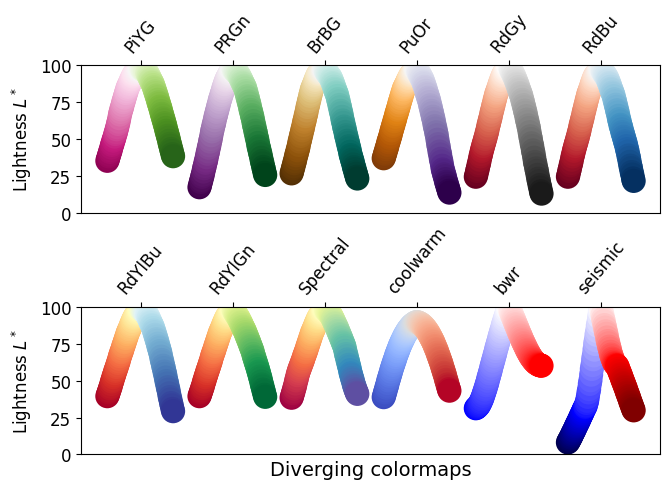

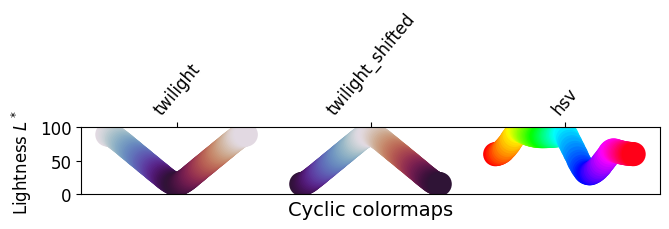

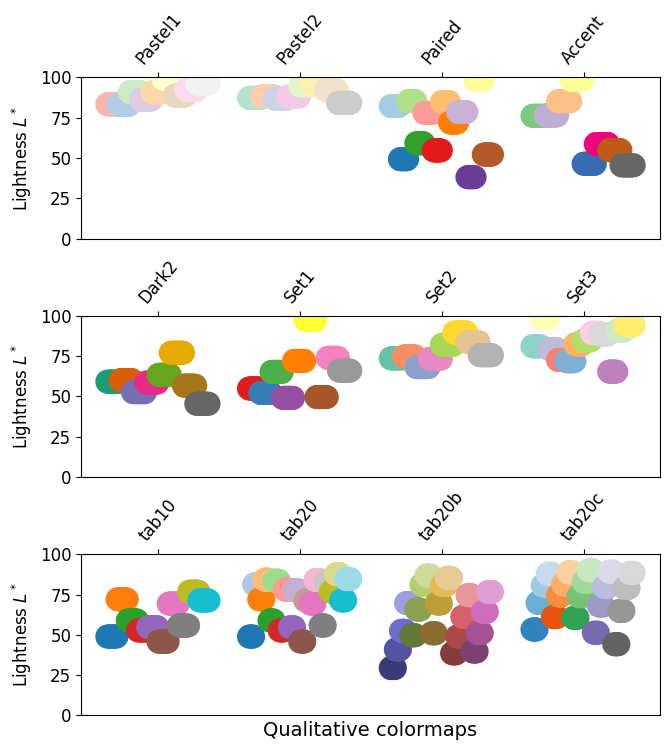

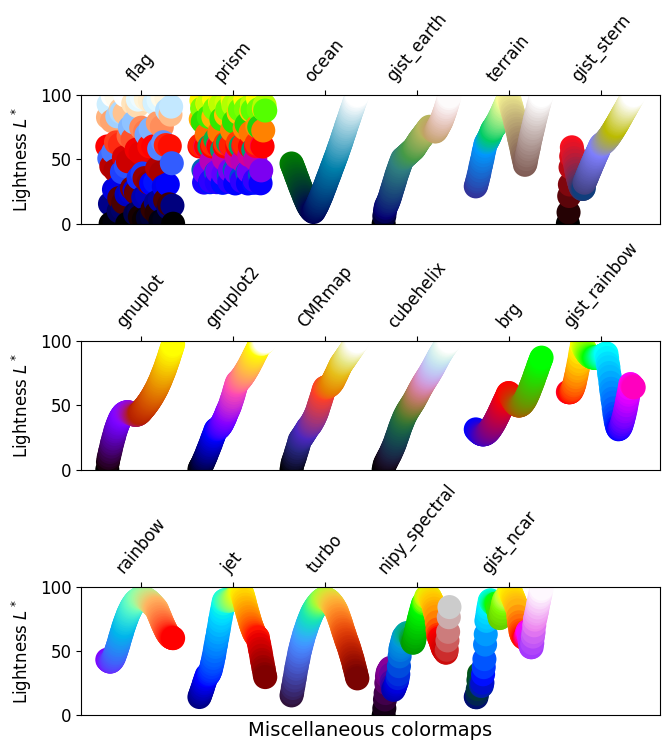

In [23]:
try:
    from colorspacious import cspace_converter
except ImportError:
    !pip install colorspacious
    from colorspacious import cspace_converter


mpl.rcParams.update({'font.size': 12})

# Number of colormap per subplot for particular cmap categories
_DSUBS = {'Perceptually Uniform Sequential': 5, 'Sequential': 6,
          'Sequential (2)': 6, 'Diverging': 6, 'Cyclic': 3,
          'Qualitative': 4, 'Miscellaneous': 6}

# Spacing between the colormaps of a subplot
_DC = {'Perceptually Uniform Sequential': 1.4, 'Sequential': 0.7,
       'Sequential (2)': 1.4, 'Diverging': 1.4, 'Cyclic': 1.4,
       'Qualitative': 1.4, 'Miscellaneous': 1.4}

# Indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# Do plot
for cmap_category, cmap_list in cmaps.items():

    # Do subplots so that colormaps have enough space.
    # Default is 6 colormaps per subplot.
    dsub = _DSUBS.get(cmap_category, 6)
    nsubplots = int(np.ceil(len(cmap_list) / dsub))

    # squeeze=False to handle similarly the case of a single subplot
    fig, axs = plt.subplots(nrows=nsubplots, squeeze=False,
                            figsize=(7, 2.6*nsubplots))

    for i, ax in enumerate(axs.flat):

        locs = []  # locations for text labels

        for j, cmap in enumerate(cmap_list[i*dsub:(i+1)*dsub]):

            # Get RGB values for colormap and convert the colormap in
            # CAM02-UCS colorspace.  lab[0, :, 0] is the lightness.
            rgb = mpl.colormaps[cmap](x)[np.newaxis, :, :3]
            lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

            # Plot colormap L values.  Do separately for each category
            # so each plot can be pretty.  To make scatter markers change
            # color along plot:
            # https://stackoverflow.com/q/8202605/

            if cmap_category == 'Sequential':
                # These colormaps all start at high lightness but we want them
                # reversed to look nice in the plot, so reverse the order.
                y_ = lab[0, ::-1, 0]
                c_ = x[::-1]
            else:
                y_ = lab[0, :, 0]
                c_ = x

            dc = _DC.get(cmap_category, 1.4)  # cmaps horizontal spacing
            ax.scatter(x + j*dc, y_, c=c_, cmap=cmap, s=300, linewidths=0.0)

            # Store locations for colormap labels
            if cmap_category in ('Perceptually Uniform Sequential',
                                 'Sequential'):
                locs.append(x[-1] + j*dc)
            elif cmap_category in ('Diverging', 'Qualitative', 'Cyclic',
                                   'Miscellaneous', 'Sequential (2)'):
                locs.append(x[int(x.size/2.)] + j*dc)

        # Set up the axis limits:
        #   * the 1st subplot is used as a reference for the x-axis limits
        #   * lightness values goes from 0 to 100 (y-axis limits)
        ax.set_xlim(axs[0, 0].get_xlim())
        ax.set_ylim(0.0, 100.0)

        # Set up labels for colormaps
        ax.xaxis.set_ticks_position('top')
        ticker = mpl.ticker.FixedLocator(locs)
        ax.xaxis.set_major_locator(ticker)
        formatter = mpl.ticker.FixedFormatter(cmap_list[i*dsub:(i+1)*dsub])
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_tick_params(rotation=50)
        ax.set_ylabel('Lightness $L^*$', fontsize=12)

    ax.set_xlabel(cmap_category + ' colormaps', fontsize=14)

    fig.tight_layout(h_pad=0.0, pad=1.5)
    plt.show()